<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# **1. Relational Graph**

In [2]:
# Load the datasets
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='year')

# Print out the dataframe
print("Residents 65Plus Data:")
print(df_residents_65plus)

# Load the datasets
df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv', index_col='year')

# Print out the dataframe
print("\nNursing Home Data:")
print(df_nursinghome)

Residents 65Plus Data:
         Age Category  Living With Spouse & At Least One Child In Household  \
year                                                                          
2024        Sub-Total                                             271800      
2023        Sub-Total                                             243700      
2022        Sub-Total                                             255800      
2021        Sub-Total                                             221800      
2020        Sub-Total                                             214600      
...               ...                                                ...      
2014  85 Years & Over                                               5700      
2013  85 Years & Over                                               5100      
2012  85 Years & Over                                               4800      
2011  85 Years & Over                                               4000      
2010  85 Years & Over        

In [3]:
# Prepare Residents Data
# Keep only year and total residents aged 65+
df_residents = df_residents_65plus.reset_index()[['year', 'Total']].copy()
df_residents['Total'] = pd.to_numeric(df_residents['Total'], errors='coerce')

# Group by year
df_residents = df_residents.groupby('year', as_index=False)['Total'].sum()
df_residents = df_residents.rename(columns={'Total': 'Residents65Plus'})

# Prepare Nursing Home Data
# Sum total number of beds by year
df_nursinghome_beds = df_nursinghome.reset_index().groupby('year', as_index=False)['no_beds'].sum()
df_nursinghome_beds = df_nursinghome_beds.rename(columns={'no_beds': 'NursingHomeBeds'})

# Merge both datasets by year
df_merge = pd.merge(df_residents, df_nursinghome_beds, on='year', how='inner')

In [4]:
# Relational Graph (Scatter Plot with Regression Line)
# Showing the correlation how the number of nursing home beds relates to number of elderly residents (65+).

# Define plotting function
def plot_relational(df):
    """
    Scatter + regression line showing how the number of nursing home beds relates to
    number of elderly residents (65+).
    """
    plt.figure(dpi=144)
    sns.scatterplot(data=df, x="Residents65Plus", y="NursingHomeBeds", s=100)
    sns.regplot(data=df, x="Residents65Plus", y="NursingHomeBeds", scatter=False, color="red")

    for _, row in df.iterrows():
        plt.text(row["Residents65Plus"], row["NursingHomeBeds"], str(row["year"]),
                 fontsize=8, ha='right', va='bottom')

    # Add Title and Labels
    plt.title("Relation: Elderly Residents (65+) vs Nursing Home Beds (Singapore)")
    plt.xlabel("Number of Residents 65+")
    plt.ylabel("Number of Nursing Home Beds")
    plt.tight_layout()

    # Show the Plot
    plt.show()

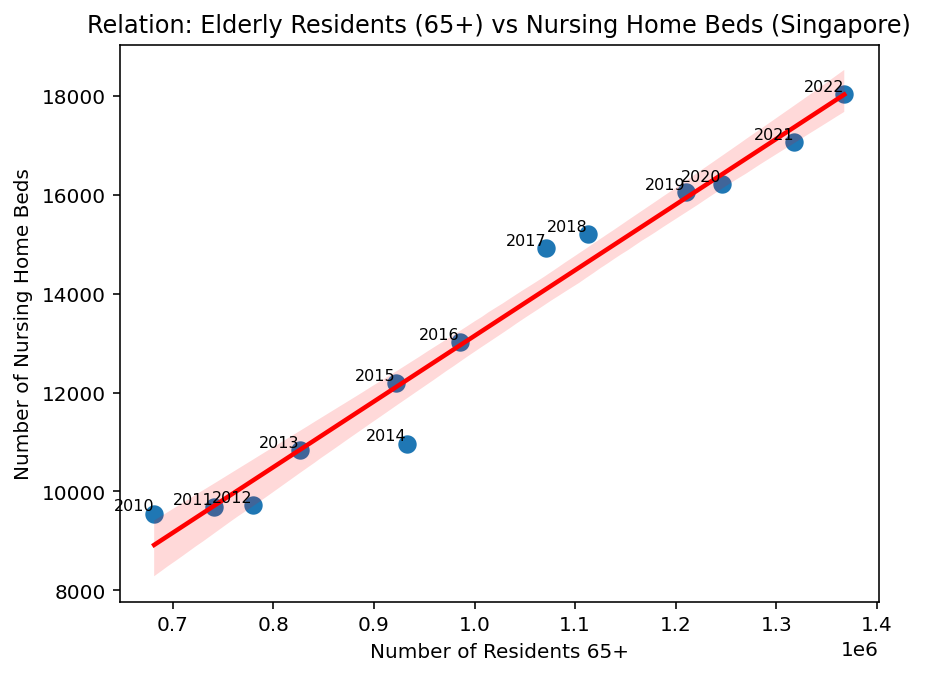

In [5]:
# General correlation between elderly residents (65+) and available nursing home beds.
# Call the plotting function
plot_relational(df_merge)

In [6]:
# Display the merged dataset for verification
print("\nMerged Dataset (for plotting):")
print(df_merge)


Merged Dataset (for plotting):
    year  Residents65Plus  NursingHomeBeds
0   2010           681500             9551
1   2011           740600             9690
2   2012           779700             9721
3   2013           826200            10838
4   2014           932700            10968
5   2015           921900            12185
6   2016           985400            13022
7   2017          1071200            14918
8   2018          1112600            15205
9   2019          1210000            16059
10  2020          1245900            16221
11  2021          1317800            17064
12  2022          1367600            18029


# **2. Categorical Graph**

In [7]:
print("Dataset Preview:")
print(df_residents.head())

Dataset Preview:
   year  Residents65Plus
0  2010           681500
1  2011           740600
2  2012           779700
3  2013           826200
4  2014           932700


In [8]:
# Data Preparation
# Convert numeric columns to numbers (some are stored as strings)
cols_to_convert = [
    'Living With Spouse & At Least One Child In Household',
    'Living With Spouse, No Children In Household',
    'Living Alone In Household',
    'Living With Children But Without Spouse In Household',
    'Others',
    'Total'
]
df_residents_65plus[cols_to_convert] = df_residents_65plus[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Focus on Sub-Total rows (not specific age groups)
df_subtotal = df_residents_65plus[df_residents_65plus['Age Category'] == 'Sub-Total'].copy()

# Reset index to make 'year' a column
df_subtotal = df_subtotal.reset_index()

# --- Melt dataframe to long format for easy plotting ---
df_melted = df_subtotal.melt(
    id_vars=['year'],
    value_vars=[
        'Living With Spouse & At Least One Child In Household',
        'Living With Spouse, No Children In Household',
        'Living Alone In Household',
        'Living With Children But Without Spouse In Household',
        'Others'
    ],
    var_name='Living_Arrangement',
    value_name='Number_of_Residents'
)

In [9]:
print("\nTransformed Data for Categorical Plot:")
print(df_melted.head())


Transformed Data for Categorical Plot:
   year                                 Living_Arrangement  \
0  2024  Living With Spouse & At Least One Child In Hou...   
1  2023  Living With Spouse & At Least One Child In Hou...   
2  2022  Living With Spouse & At Least One Child In Hou...   
3  2021  Living With Spouse & At Least One Child In Hou...   
4  2020  Living With Spouse & At Least One Child In Hou...   

   Number_of_Residents  
0               271800  
1               243700  
2               255800  
3               221800  
4               214600  


In [10]:
# Function 1: Stacked Bar Chart
def plot_categorical_stacked_bar(df):
    """
    Categorical Graph: Stacked Bar Chart comparing living arrangements of elderly residents by year.
    """
    # Pivot data to make categories as columns
    df_pivot = df.pivot(index='year', columns='Living_Arrangement', values='Number_of_Residents')

    # Sort by year for correct order
    df_pivot = df_pivot.sort_index()

    # Plot stacked bar chart
    ax = df_pivot.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        colormap='tab20',
        edgecolor='black'
    )

    plt.title("Stacked Bar Chart: Living Arrangements of Residents Aged 65+ by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Residents")
    plt.legend(title='Living Arrangement', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

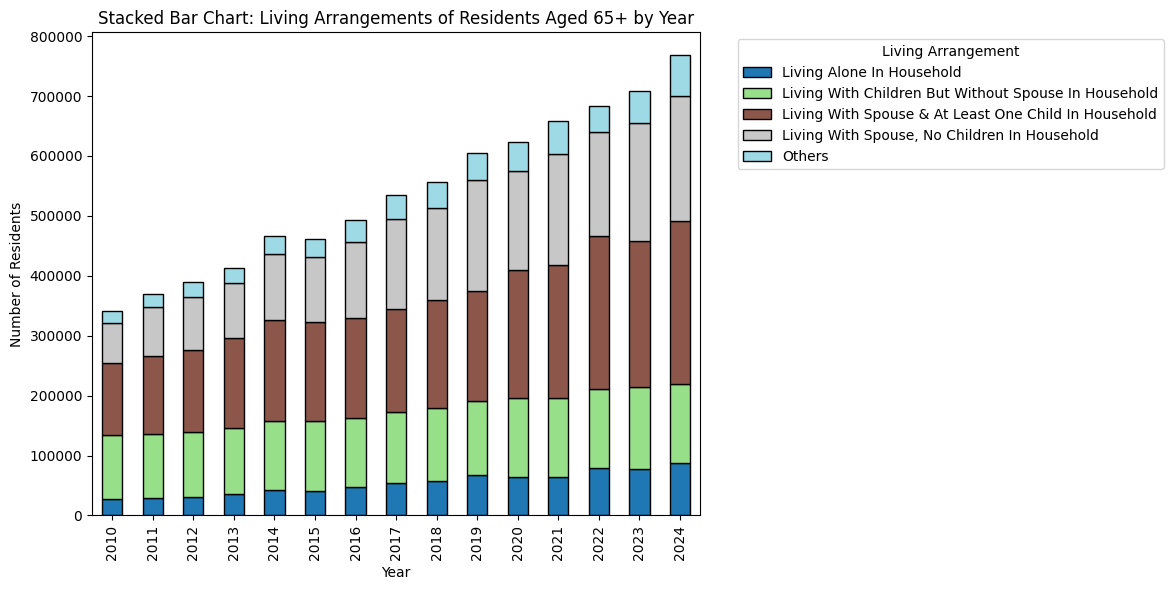

In [11]:
# Call the Functions
plot_categorical_stacked_bar(df_melted)

In [12]:
# Function 2: Boxplot (Distribution per Category)
def plot_categorical_box(df):
    """
    Categorical Graph: Boxplot comparing the distribution of residents by living arrangement.
    """
    plt.figure(figsize=(10, 6), dpi=144)
    sns.boxplot(data=df, x='Living_Arrangement', y='Number_of_Residents')
    plt.title("Distribution of Residents by Living Arrangement (Boxplot)")
    plt.xlabel("Living Arrangement")
    plt.ylabel("Number of Residents")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


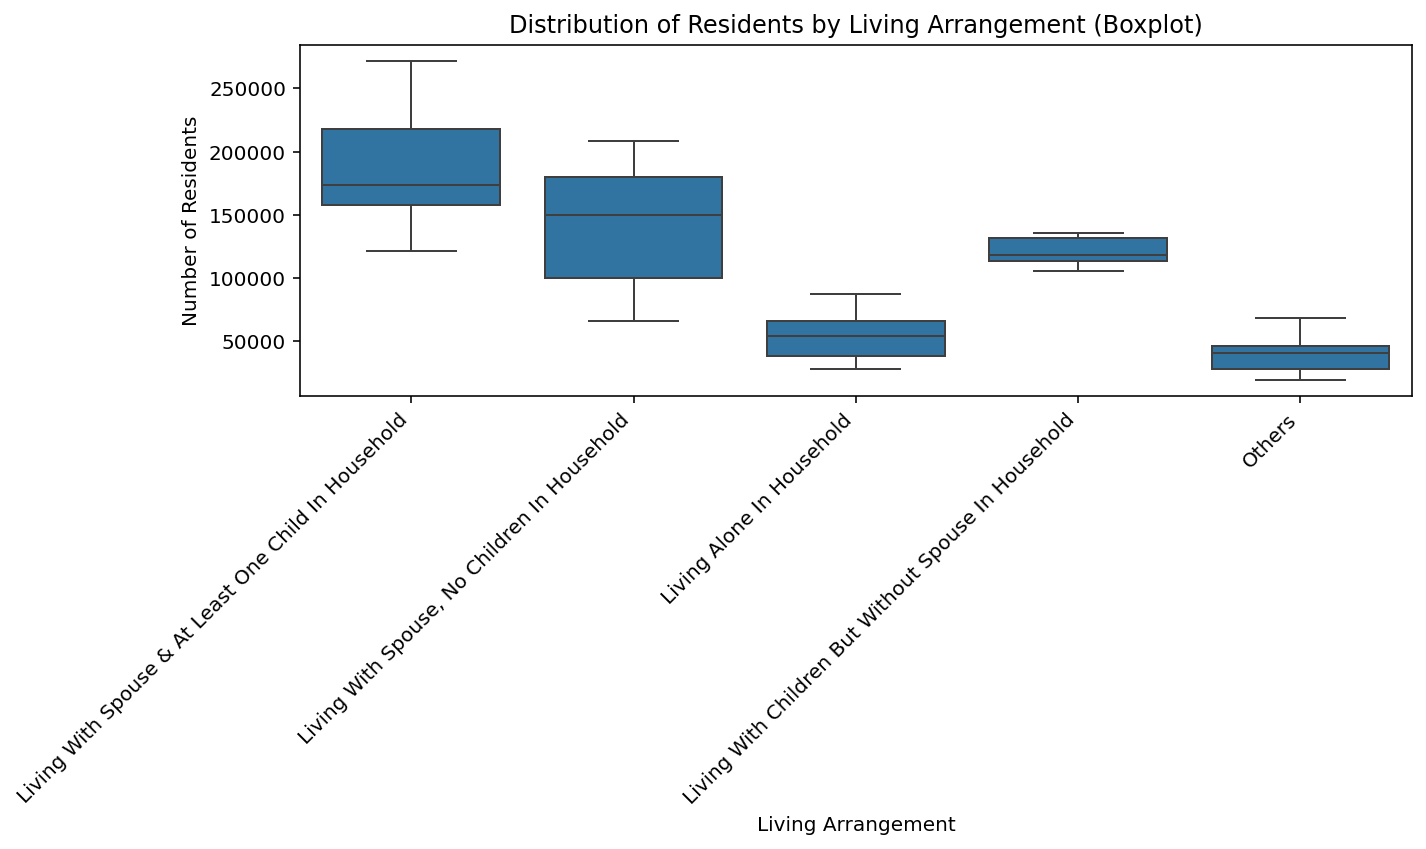

In [13]:
# Call the Functions
plot_categorical_box(df_melted)

In [16]:
# Data Cleaning
# Ensure correct data types
df_nursinghome = df_nursinghome.reset_index()
df_nursinghome['year'] = pd.to_numeric(df_nursinghome['year'], errors='coerce')
df_nursinghome['no_beds'] = pd.to_numeric(df_nursinghome['no_beds'], errors='coerce')

# Drop rows with missing essential values
df_nursinghome = df_nursinghome.dropna(subset=['year', 'no_beds'])

# Try to identify category columns
type_col = None
for possible in ['type', 'Type', 'facility_type_a']:
    if possible in df_nursinghome.columns:
        type_col = possible
        break

ownership_col = None
for possible in ['ownership', 'Ownership', 'public_private', 'Owner']:
    if possible in df_nursinghome.columns:
        ownership_col = possible
        break

In [17]:
# Function 1: Grouped Bar Chart by Facility Type
def plot_categorical_bar_by_type(df, type_col):
    """
    Grouped bar chart comparing average number of beds per facility type by year.
    """
    if type_col is None:
        print("⚠️ No 'type' column found in dataset.")
        return

    df_grouped = df.groupby(['year', type_col], as_index=False)['no_beds'].sum()

    plt.figure(figsize=(12, 6), dpi=144)
    sns.barplot(data=df_grouped, x='year', y='no_beds', hue=type_col, palette='tab20')
    plt.title("Categorical Graph: Nursing Home Beds by Facility Type and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Facility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

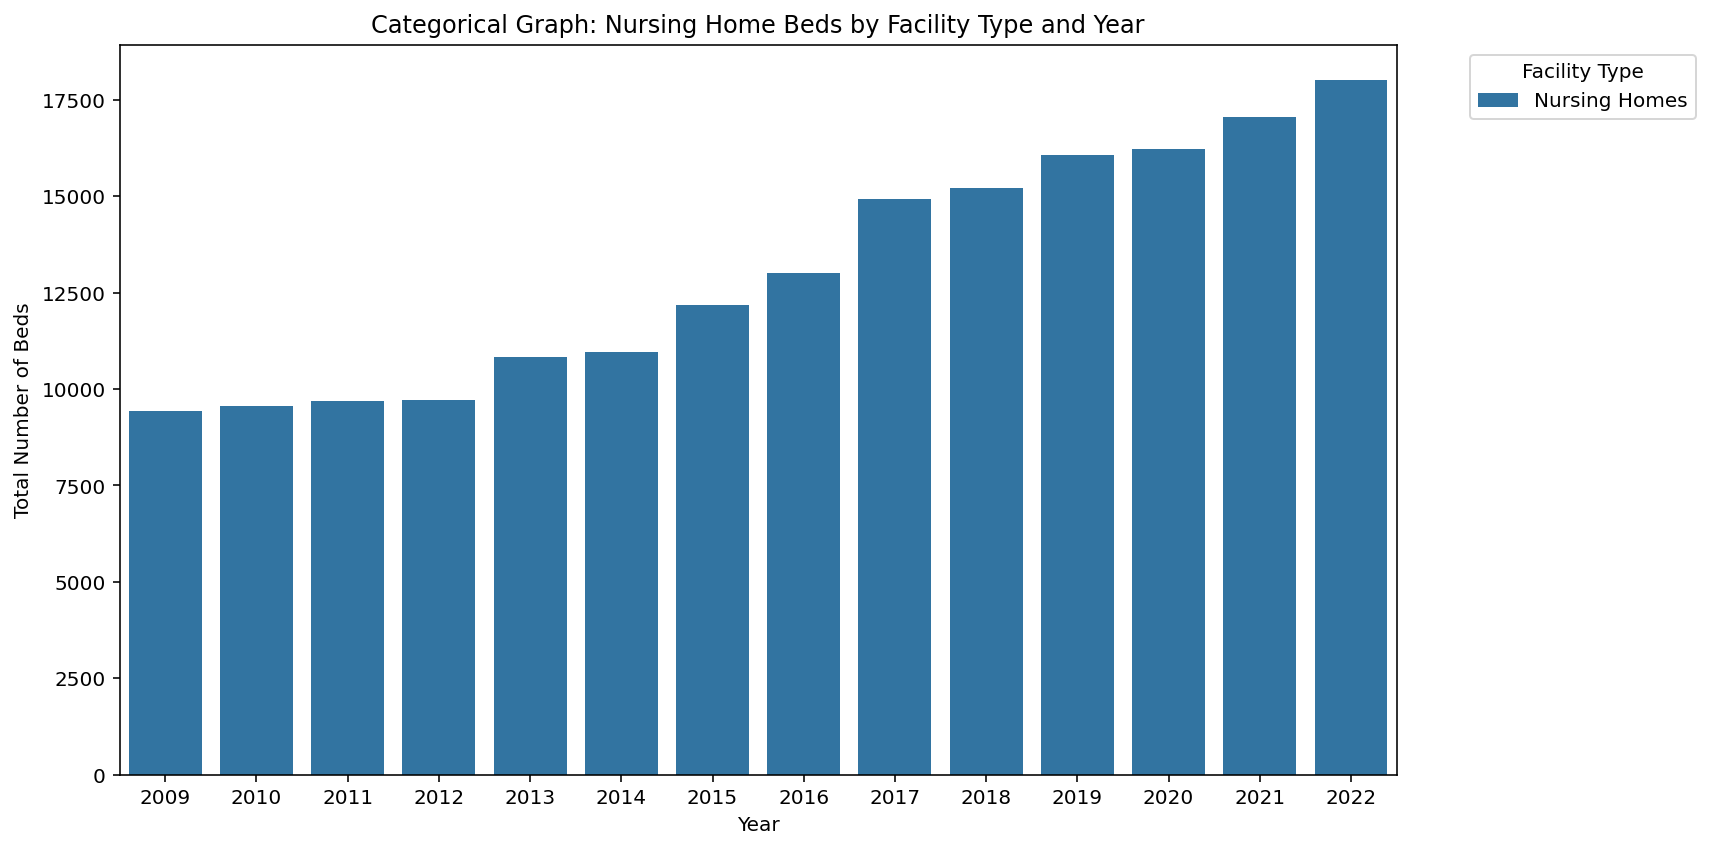

In [18]:
# Call the functions
plot_categorical_bar_by_type(df_nursinghome, type_col)

In [19]:
# Function 2: Stacked Bar Chart by Ownership
def plot_categorical_stacked_bar_by_ownership(df, ownership_col):
    """
    Stacked bar chart showing total nursing home beds by ownership each year.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    df_grouped = df.groupby(['year', ownership_col], as_index=False)['no_beds'].sum()
    df_pivot = df_grouped.pivot(index='year', columns=ownership_col, values='no_beds').fillna(0)

    # Plot stacked bar chart
    df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', edgecolor='black')
    plt.title("Stacked Bar Chart: Nursing Home Beds by Ownership and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Ownership", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

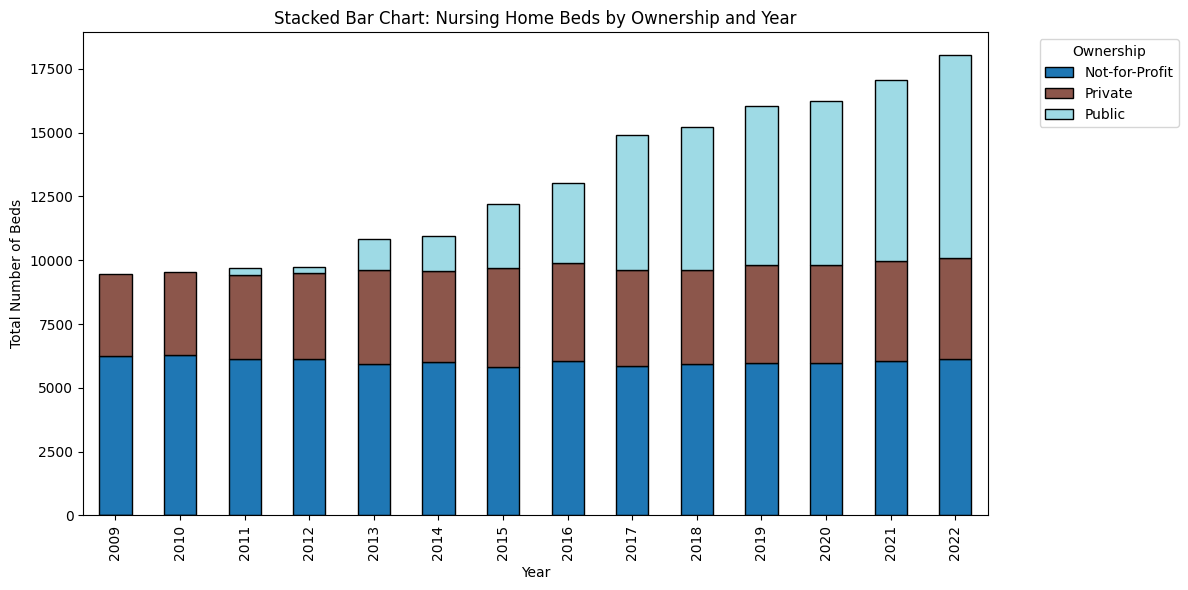

In [20]:
# Call the functions
plot_categorical_stacked_bar_by_ownership(df_nursinghome, ownership_col)

In [21]:
# Function 3: Boxplot comparing distribution of beds by ownership
def plot_categorical_box(df, ownership_col):
    """
    Boxplot to compare the distribution of nursing home beds by ownership.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    plt.figure(figsize=(8, 6), dpi=144)
    sns.boxplot(data=df, x=ownership_col, y='no_beds', palette='pastel')
    plt.title("Distribution of Nursing Home Beds by Ownership (Boxplot)")
    plt.xlabel("Ownership")
    plt.ylabel("Number of Beds per Facility")
    plt.tight_layout()
    plt.show()

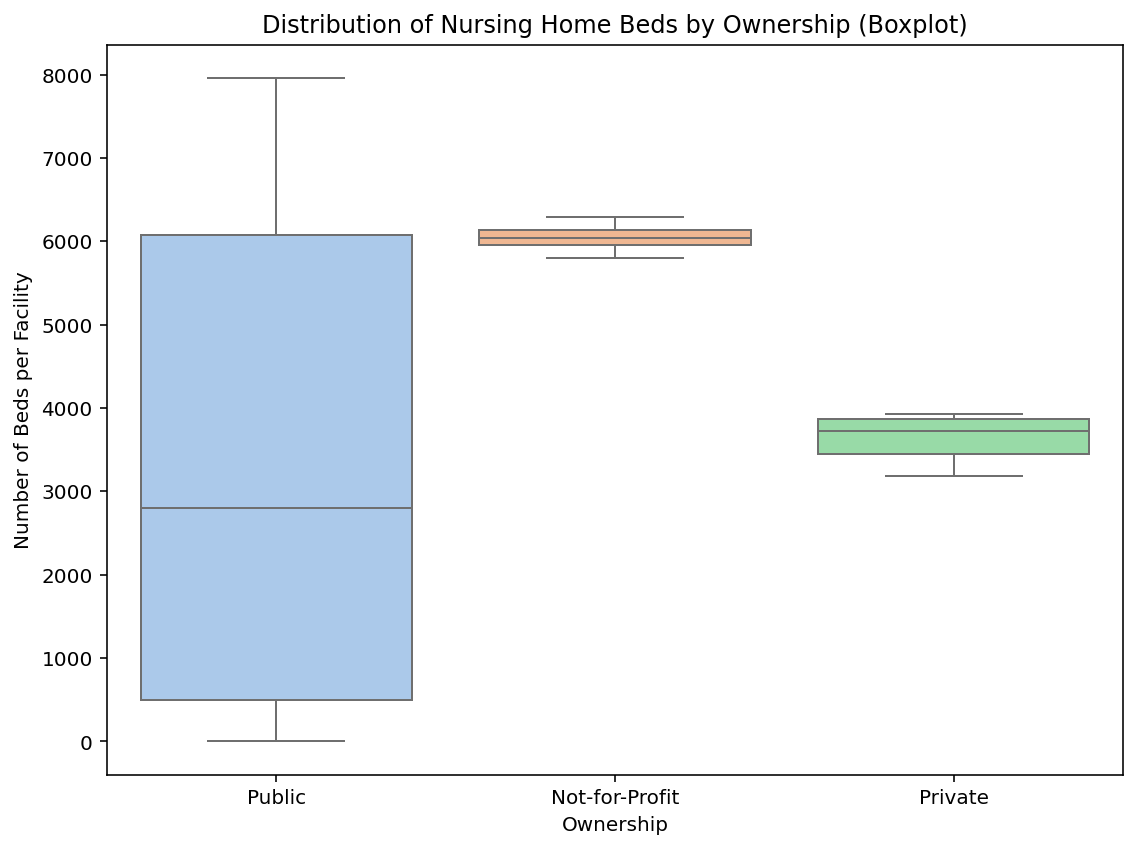

In [22]:
# Call the functions
plot_categorical_box(df_nursinghome, ownership_col)

# **3. Statistical Graph**

In [27]:
# Load the datasets
df_healthy_life = pd.read_csv('WHO_SG_Healthy Life Expectancy at Birth.csv')
df_life_expectancy = pd.read_csv('WHO_SG_Life Expectancy at Birth.csv')
df_death_causes = pd.read_csv('WHO_SG_Top Causes of Death.csv')


In [30]:
# Data Preparation Functions
def prepare_life_expectancy_data(df_healthy, df_life):
    """Prepare and merge healthy life expectancy and total life expectancy data"""
    # Clean and filter data
    healthy_clean = df_healthy[['DIM_TIME', 'DIM_SEX', 'AMOUNT_N']].copy()
    life_clean = df_life[['DIM_TIME', 'DIM_SEX', 'AMOUNT_N']].copy()

    # Rename columns for clarity
    healthy_clean.columns = ['Year', 'Sex', 'Healthy_Life_Expectancy']
    life_clean.columns = ['Year', 'Sex', 'Total_Life_Expectancy']

    # Merge datasets
    merged_df = pd.merge(healthy_clean, life_clean, on=['Year', 'Sex'])

    # Calculate unhealthy years
    merged_df['Unhealthy_Years'] = merged_df['Total_Life_Expectancy'] - merged_df['Healthy_Life_Expectancy']

    return merged_df

def prepare_death_causes_data(df):
    """Prepare death causes data for analysis"""
    # Filter out zero values and sort by death rate
    df_filtered = df[df['VAL_DTHS_RATE100K_NUMERIC'] > 0].copy()
    df_sorted = df_filtered.sort_values('VAL_DTHS_RATE100K_NUMERIC', ascending=False)

    return df_sorted


In [32]:
# Plotting Functions
def plot_life_expectancy_trends(df):
    """Line chart showing life expectancy trends by gender over time"""
    plt.figure(figsize=(12, 8))

    for sex in df['Sex'].unique():
        df_sex = df[df['Sex'] == sex]
        plt.plot(df_sex['Year'], df_sex['Total_Life_Expectancy'],
                marker='o', linewidth=2, label=f'Total Life Expectancy - {sex}')
        plt.plot(df_sex['Year'], df_sex['Healthy_Life_Expectancy'],
                marker='s', linewidth=2, linestyle='--', label=f'Healthy Life Expectancy - {sex}')

    plt.title('Life Expectancy Trends in Singapore (2000-2021)', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [33]:
# Plotting Functions
def plot_healthy_vs_unhealthy_years(df):
    """Stacked bar chart showing healthy vs unhealthy years"""
    df_total = df[df['Sex'] == 'TOTAL']

    fig, ax = plt.subplots(figsize=(14, 8))

    years = df_total['Year']
    healthy = df_total['Healthy_Life_Expectancy']
    unhealthy = df_total['Unhealthy_Years']

    ax.bar(years, healthy, label='Healthy Years', color='green', alpha=0.7)
    ax.bar(years, unhealthy, bottom=healthy, label='Unhealthy Years', color='red', alpha=0.7)

    plt.title('Healthy vs Unhealthy Years in Singapore (Total Population)', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [34]:
# Plotting Functions
def plot_gender_comparison(df):
    """Box plot comparing life expectancy distributions by gender"""
    plt.figure(figsize=(10, 6))

    data_to_plot = []
    labels = []

    for sex in ['MALE', 'FEMALE']:
        df_sex = df[df['Sex'] == sex]
        data_to_plot.append(df_sex['Total_Life_Expectancy'])
        labels.append(sex)

    plt.boxplot(data_to_plot, labels=labels)
    plt.title('Distribution of Life Expectancy by Gender', fontsize=14, fontweight='bold')
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [35]:
# Plotting Functions
def plot_top_death_causes(df, top_n=15):
    """Horizontal bar chart of top causes of death"""
    top_causes = df.head(top_n)

    plt.figure(figsize=(12, 8))
    plt.barh(top_causes['DIM_GHECAUSE_TITLE'], top_causes['VAL_DTHS_RATE100K_NUMERIC'])
    plt.title(f'Top {top_n} Causes of Death in Singapore (2021)', fontsize=14, fontweight='bold')
    plt.xlabel('Death Rate per 100,000 Population', fontsize=12)
    plt.ylabel('Cause of Death', fontsize=12)
    plt.gca().invert_yaxis()  # Highest values at top
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()


In [36]:
# Plotting Functions
def plot_death_causes_histogram(df):
    """Histogram showing distribution of death rates"""
    plt.figure(figsize=(10, 6))
    plt.hist(df['VAL_DTHS_RATE100K_NUMERIC'], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Death Rates for Different Causes (Singapore 2021)', fontsize=14, fontweight='bold')
    plt.xlabel('Death Rate per 100,000 Population', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [37]:
# Plotting Functions
def plot_life_expectancy_regression(df):
    """Scatter plot with regression line showing relationship between healthy and total life expectancy"""
    plt.figure(figsize=(10, 8))

    colors = {'MALE': 'blue', 'FEMALE': 'red', 'TOTAL': 'green'}

    for sex in df['Sex'].unique():
        df_sex = df[df['Sex'] == sex]
        plt.scatter(df_sex['Healthy_Life_Expectancy'], df_sex['Total_Life_Expectancy'],
                   c=colors[sex], label=sex, alpha=0.7, s=60)

        # Add regression line
        z = np.polyfit(df_sex['Healthy_Life_Expectancy'], df_sex['Total_Life_Expectancy'], 1)
        p = np.poly1d(z)
        plt.plot(df_sex['Healthy_Life_Expectancy'], p(df_sex['Healthy_Life_Expectancy']),
                color=colors[sex], linestyle='--', alpha=0.8)

    plt.title('Relationship Between Healthy and Total Life Expectancy', fontsize=14, fontweight='bold')
    plt.xlabel('Healthy Life Expectancy (Years)', fontsize=12)
    plt.ylabel('Total Life Expectancy (Years)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


Singapore Health Statistics Analysis

Basic Statistics - Life Expectancy:
       Total_Life_Expectancy                                             \
                       count       mean       std        min        25%   
Sex                                                                       
FEMALE                  22.0  83.889001  1.630924  80.774170  82.816018   
MALE                    22.0  79.441354  1.712038  76.257304  78.140975   
TOTAL                   22.0  81.686158  1.658053  78.520888  80.552055   

                                        Healthy_Life_Expectancy             \
              50%        75%        max                   count       mean   
Sex                                                                          
FEMALE  84.063748  85.234844  86.329270                    22.0  73.198343   
MALE    79.588031  80.968067  81.813664                    22.0  70.703145   
TOTAL   81.860970  83.128436  83.996536                    22.0  71.981017   

      

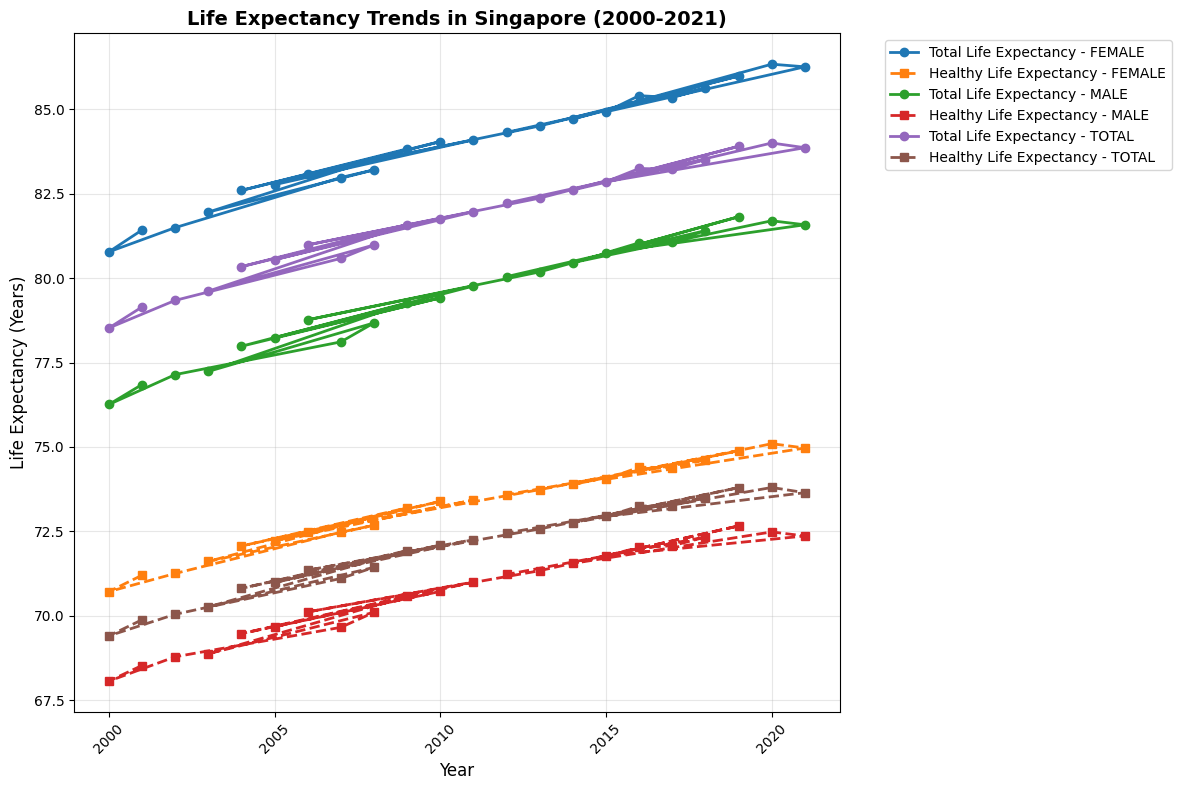

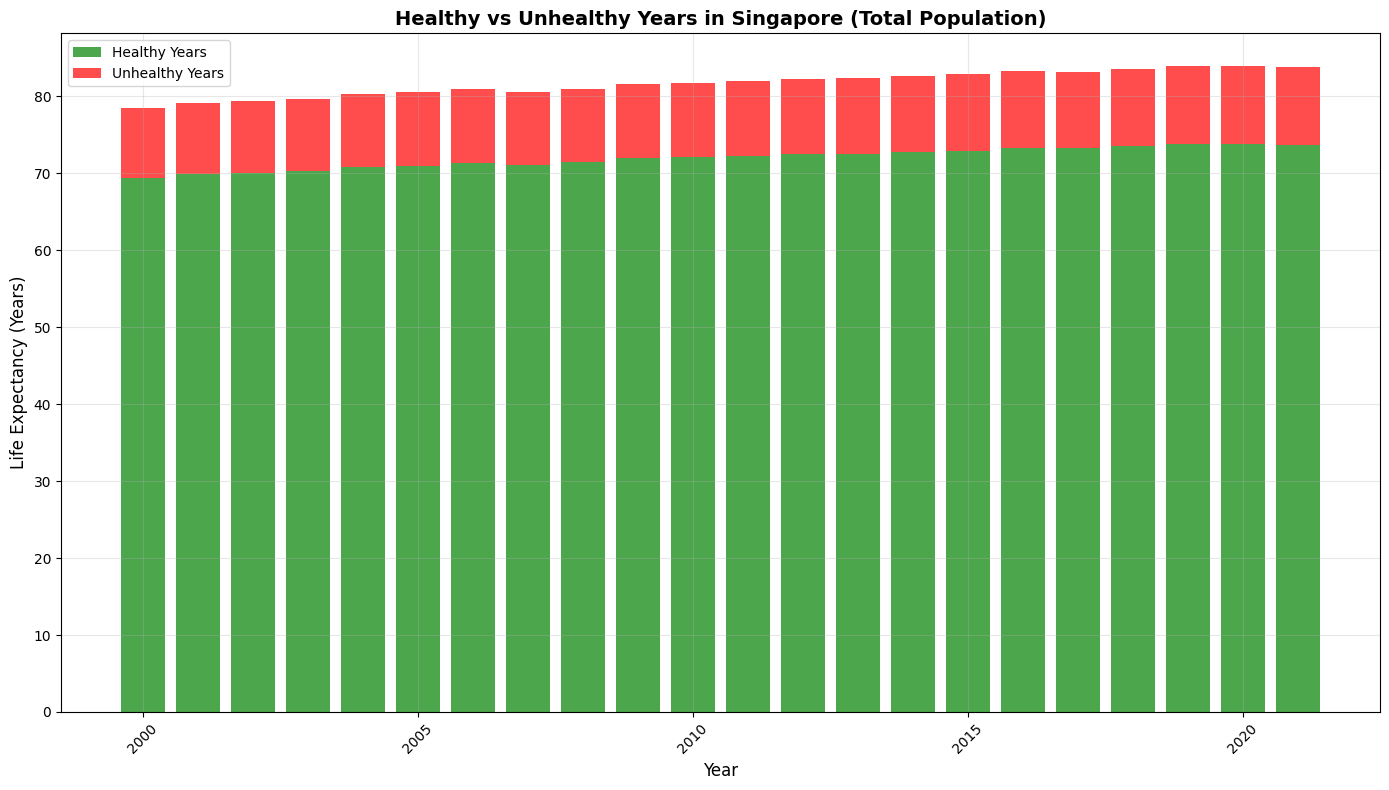

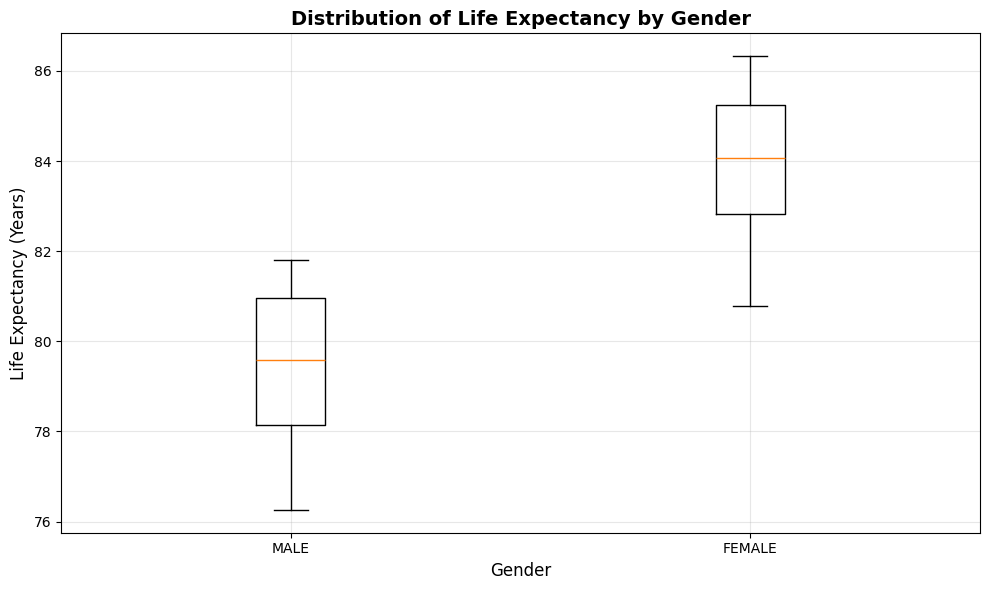

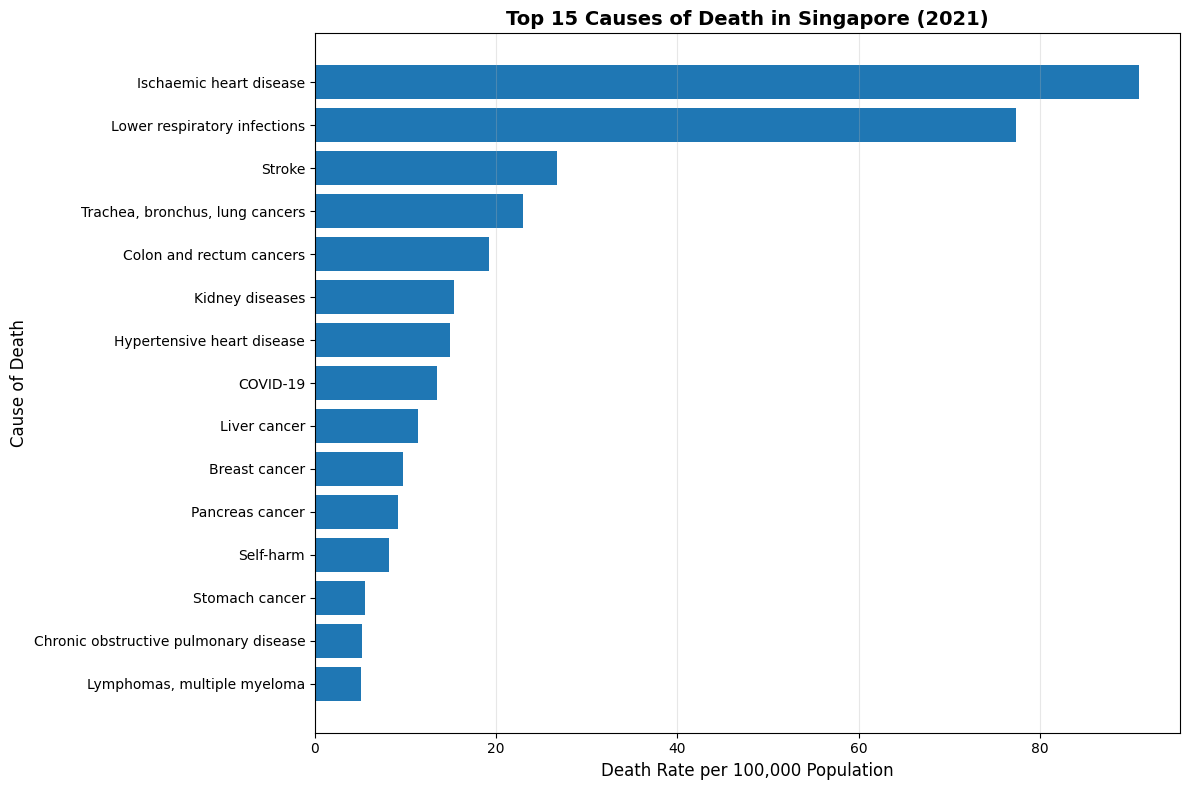

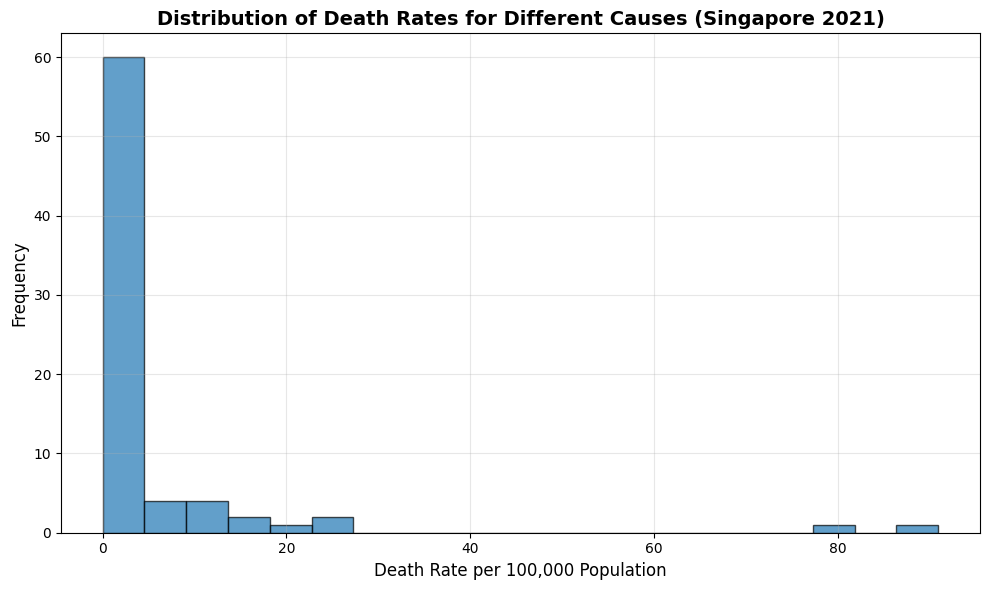

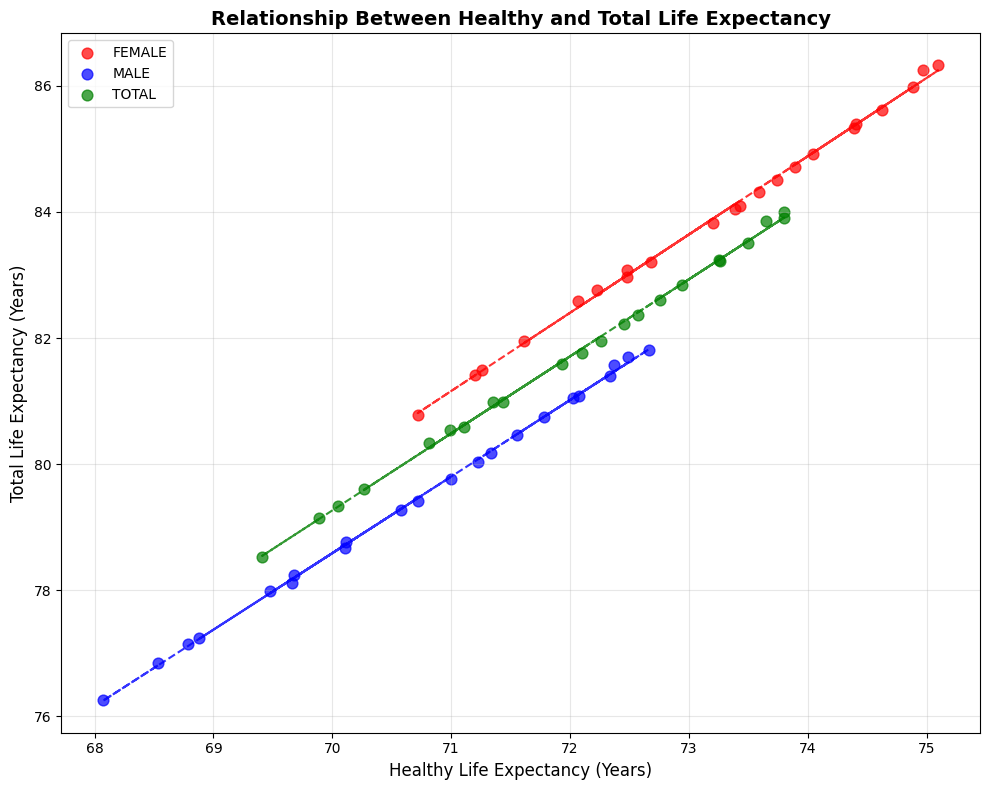

Analysis complete! All graphs have been generated.


In [38]:
# Plotting Functions
# Main Analysis
def main():
    print("Singapore Health Statistics Analysis")
    print("=" * 40)

    # Prepare data
    df_life_merged = prepare_life_expectancy_data(df_healthy_life, df_life_expectancy)
    df_death_causes_clean = prepare_death_causes_data(df_death_causes)

    # Display basic statistics
    print("\nBasic Statistics - Life Expectancy:")
    print(df_life_merged.groupby('Sex')[['Total_Life_Expectancy', 'Healthy_Life_Expectancy']].describe())

    print(f"\nDeath Causes Analysis:")
    print(f"Total causes with non-zero death rates: {len(df_death_causes_clean)}")
    print(f"Average death rate: {df_death_causes_clean['VAL_DTHS_RATE100K_NUMERIC'].mean():.2f} per 100,000")
    print(f"Median death rate: {df_death_causes_clean['VAL_DTHS_RATE100K_NUMERIC'].median():.2f} per 100,000")

    # Generate all plots
    print("\nGenerating Statistical Graphs...")

    plot_life_expectancy_trends(df_life_merged)
    plot_healthy_vs_unhealthy_years(df_life_merged)
    plot_gender_comparison(df_life_merged)
    plot_top_death_causes(df_death_causes_clean, top_n=15)
    plot_death_causes_histogram(df_death_causes_clean)
    plot_life_expectancy_regression(df_life_merged)

    print("Analysis complete! All graphs have been generated.")

# --- Execute the main function ---
if __name__ == "__main__":
    main()